In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('agricultural_raw_material.csv')

# Data Cleaning: Remove commas and convert price columns to numeric
cols_to_clean = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 
                 'Hard log Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 
                 'Soft sawnwood Price', 'Wood pulp Price']

for col in cols_to_clean:
    data[col] = pd.to_numeric(data[col].replace({',': ''}, regex=True), errors='coerce')

# Convert percentage change columns from strings to numbers
cols_percentage_change = ['Coarse wool price % Change', 'Copra price % Change', 
                          'Cotton price % Change', 'Fine wool price % Change', 
                          'Plywood price % Change', 'Rubber price % Change', 
                          'Softlog price % Change', 'Soft sawnwood price % Change', 
                          'Wood pulp price % Change']

for col in cols_percentage_change:
    data[col] = pd.to_numeric(data[col].str.replace('%', '').replace({'-': None}), errors='coerce')

# Convert 'Month' to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

# Check for any missing data or types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Month                         361 non-null    datetime64[ns]
 1   Coarse wool Price             327 non-null    float64       
 2   Coarse wool price % Change    326 non-null    float64       
 3   Copra Price                   339 non-null    float64       
 4   Copra price % Change          338 non-null    float64       
 5   Cotton Price                  361 non-null    float64       
 6   Cotton price % Change         360 non-null    float64       
 7   Fine wool Price               327 non-null    float64       
 8   Fine wool price % Change      326 non-null    float64       
 9   Hard log Price                361 non-null    float64       
 10  Hard log price % Change       361 non-null    object        
 11  Hard sawnwood Price           32

In [4]:
# Calculate the minimum and maximum prices for each raw material
price_range = data[cols_to_clean].agg(['min', 'max'])

# Display the price ranges for each material
print("Price Ranges (min and max) for each raw material:")
print(price_range)


Price Ranges (min and max) for each raw material:
     Coarse wool Price  Copra Price  Cotton Price  Fine wool Price  \
min             247.09        182.0          0.82           417.47   
max            1391.47       1503.0          5.06          1865.44   

     Hard log Price  Plywood Price  Rubber Price  Softlog Price  \
min          133.28         312.36          0.49         119.35   
max          520.81         751.81          6.26         259.97   

     Soft sawnwood Price  Wood pulp Price  
min               183.61           384.00  
max               372.60           966.49  


In [5]:
# Calculate the minimum and maximum percentage changes for each material
percentage_change_range = data[cols_percentage_change].agg(['min', 'max'])

# Display the percentage change ranges for each material
print("Percentage Change Ranges (min and max) for each material:")
print(percentage_change_range)


Percentage Change Ranges (min and max) for each material:
     Coarse wool price % Change  Copra price % Change  Cotton price % Change  \
min                      -22.25                -19.17                 -23.64   
max                       21.99                 31.82                  22.22   

     Fine wool price % Change  Plywood price % Change  Rubber price % Change  \
min                    -32.84                  -11.05                 -32.16   
max                     27.07                   19.50                  24.17   

     Softlog price % Change  Soft sawnwood price % Change  \
min                  -29.12                        -41.62   
max                   33.21                         65.24   

     Wood pulp price % Change  
min                    -21.57  
max                     12.69  


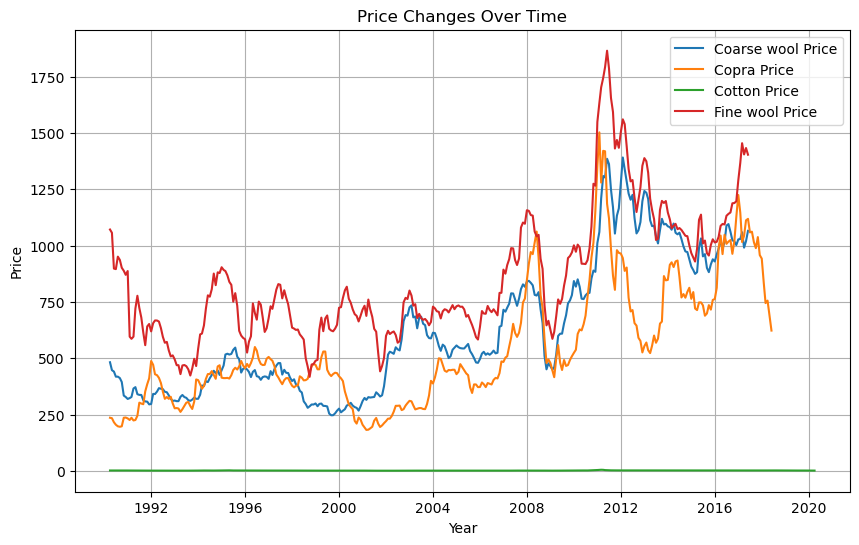

In [6]:
import matplotlib.pyplot as plt

# Plot price trends over time for selected materials
materials_to_plot = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price']
plt.figure(figsize=(10, 6))

for material in materials_to_plot:
    plt.plot(data['Month'], data[material], label=material)

plt.title('Price Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


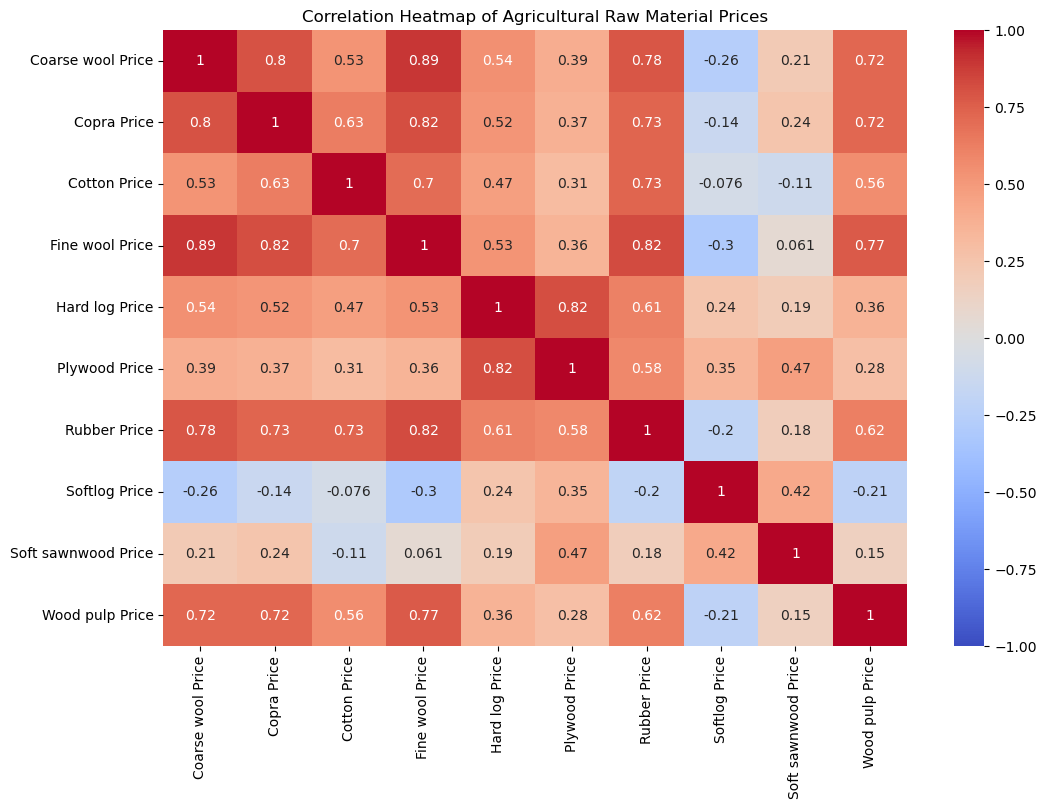

In [7]:
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
correlation_matrix = data[cols_to_clean].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Agricultural Raw Material Prices')
plt.show()
